In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# loading the dataset
df = pd.read_csv('word_develop_ind.csv')
df.head() # display the first 5 rows of the dataset

,Country Name,Series Name,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,GDP (current US$),12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,Afghanistan,GNI (current US$),12378340930.5187,15885775064.3022,17781511431.23,19961261595.0253,20209353657.8054,20559672324.9094,19249499438.7455,18350475875.2999,18961769787.4548,18294513957.5523,19080662010.7479,20105156769.1907,14352632363.74,14545219074.5763,..
2,Afghanistan,Imports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,7241822542.17594,5288529076.39681,7904463276.83616,..
3,Afghanistan,Exports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,2079570874.83738,2046123147.09236,2665502824.85876,..
4,Afghanistan,"Inflation, consumer prices (annual %)",-6.81116108898993,2.17853752389414,11.8041858089129,6.44121280934117,7.38577178397855,4.67399603536305,-0.66170916471352,4.38389195513893,4.97595150553892,0.626149149168983,2.30237251516819,..,..,..,..


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1736 non-null   object
 1   Series Name    1736 non-null   object
 2   2009 [YR2009]  1736 non-null   object
 3   2010 [YR2010]  1736 non-null   object
 4   2011 [YR2011]  1736 non-null   object
 5   2012 [YR2012]  1736 non-null   object
 6   2013 [YR2013]  1736 non-null   object
 7   2014 [YR2014]  1736 non-null   object
 8   2015 [YR2015]  1736 non-null   object
 9   2016 [YR2016]  1736 non-null   object
 10  2017 [YR2017]  1736 non-null   object
 11  2018 [YR2018]  1736 non-null   object
 12  2019 [YR2019]  1736 non-null   object
 13  2020 [YR2020]  1736 non-null   object
 14  2021 [YR2021]  1736 non-null   object
 15  2022 [YR2022]  1736 non-null   object
 16  2023 [YR2023]  1736 non-null   object
dtypes: object(17)
memory usage: 230.7+ KB


In [42]:
# Function to clean column names
def clean_column_name(col):
    if '[' in col and 'YR' in col and ']' in col:
        return col.split(' ')[0]
    return col

# Apply the function to all column names
df.columns = [clean_column_name(col) for col in df.columns]

# Display the cleaned DataFrame columns
print(df.columns)

Index(['Country Name', 'Series Name', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [43]:
# Convert all year columns to numeric before melting the DataFrame
years = [str(year) for year in range(2009 , 2024)]
df[years] = df[years].apply(pd.to_numeric, errors='coerce')

In [44]:
df.dtypes

Country Name     object
Series Name      object
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
2023            float64
dtype: object

In [45]:
# Melt the DataFrame to convert the year columns into rows 
df = pd.melt(df, id_vars=['Country Name', 'Series Name'], 
                    var_name='Year', value_name='Value')

In [46]:
df.head()

,Country Name,Series Name,Year,Value
0,Afghanistan,GDP (current US$),2009,1.241615e+10
1,Afghanistan,GNI (current US$),2009,1.237834e+10
2,Afghanistan,Imports of goods and services (current US$),2009,NaN
3,Afghanistan,Exports of goods and services (current US$),2009,NaN
4,Afghanistan,"Inflation, consumer prices (annual %)",2009,-6.811161e+00


In [47]:
# Pivot the DataFrame to convert the Series Name column into separate columns 
df = df.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value')

# Reset the index of the DataFrame 
df.reset_index(inplace=True)

In [48]:
df.head()

Series Name,Country Name,Year,Exports of goods and services (current US$),GDP (current US$),GNI (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total"
0,Afghanistan,2009,NaN,1.241615e+10,1.237834e+10,NaN,6.107141,-6.811161,6504675.0,27385307.0
1,Afghanistan,2010,NaN,1.585667e+10,1.588578e+10,NaN,6.270601,2.178538,6738587.0,28189672.0
2,Afghanistan,2011,NaN,1.780510e+10,1.778151e+10,NaN,9.807670,11.804186,7095658.0,29249157.0
3,Afghanistan,2012,NaN,1.990733e+10,1.996126e+10,NaN,6.394071,6.441213,7520865.0,30466479.0
4,Afghanistan,2013,NaN,2.014642e+10,2.020935e+10,NaN,5.060991,7.385772,7881567.0,31541209.0


In [49]:
# Display the shape of the DataFrame
df.shape

(3255, 10)

In [50]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

## Feature Engineering

In [51]:
# create gdp per capita column
df['GDP_Per_Capita'] = round(df['GDP (current US$)'] / df['Population, total'], 2)

# Create a new column for the Trade_Rate
df['Trade_Rate'] = round(df['Exports of goods and services (current US$)'] / df['Imports of goods and services (current US$)'], 2)

# Trade Ratio 
df['Trade_Ratio'] = round(df['Exports of goods and services (current US$)'] / df['Imports of goods and services (current US$)'], 2)

In [52]:
# drop columns
df.drop(columns=['GDP (current US$)', 'Exports of goods and services (current US$)', 'Imports of goods and services (current US$)'], inplace=True)
df.head()

Series Name,Country Name,Year,GNI (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total",GDP_Per_Capita,Trade_Rate,Trade_Ratio
0,Afghanistan,2009,1.237834e+10,6.107141,-6.811161,6504675.0,27385307.0,453.39,NaN,NaN
1,Afghanistan,2010,1.588578e+10,6.270601,2.178538,6738587.0,28189672.0,562.50,NaN,NaN
2,Afghanistan,2011,1.778151e+10,9.807670,11.804186,7095658.0,29249157.0,608.74,NaN,NaN
3,Afghanistan,2012,1.996126e+10,6.394071,6.441213,7520865.0,30466479.0,653.42,NaN,NaN
4,Afghanistan,2013,2.020935e+10,5.060991,7.385772,7881567.0,31541209.0,638.73,NaN,NaN


In [53]:
# rename columns Industry (including construction), value added (annual % growth) and Inflation, consumer prices (annual %)  
df.rename(columns={ 'Labor force, total': 'Labor_force',
                    'Country Name': 'Country',
                    'Population, total': 'Population',
                    'GNI (current US$)': 'Gross_National_Income',
                    'Industry (including construction), value added (annual % growth)': 'Industry_growth_rate', 
                    'Inflation, consumer prices (annual %)': 'Inflation_rate'}, inplace=True)

In [54]:
# fill missing values with the interpolation method
df['Gross_National_Income'] = df['Gross_National_Income'].interpolate()
df['Industry_growth_rate'] = df['Industry_growth_rate'].interpolate()
df['Inflation_rate'] = df['Inflation_rate'].interpolate()
df['Labor_force'] = df['Labor_force'].interpolate()
df['GDP_Per_Capita'] = df['GDP_Per_Capita'].interpolate()
df['Trade_Rate'] = df['Trade_Rate'].interpolate()
df['Trade_Ratio'] = df['Trade_Ratio'].interpolate()

# drop rows with missing values
df.dropna(inplace=True)
df.head()

Series Name,Country,Year,Gross_National_Income,Industry_growth_rate,Inflation_rate,Labor_force,Population,GDP_Per_Capita,Trade_Rate,Trade_Ratio
11,Afghanistan,2020,2.010516e+10,-4.630253,2.295282,9105733.0,38972230.0,512.060,0.290,0.290
12,Afghanistan,2021,1.435263e+10,-12.808740,2.288192,9356574.0,40099462.0,355.780,0.390,0.390
13,Afghanistan,2022,1.454522e+10,-5.725220,2.281102,8803873.0,41128771.0,352.600,0.340,0.340
14,Afghanistan,2023,1.319898e+10,-1.931600,2.274012,8920521.0,42239854.0,2233.365,0.425,0.425
15,Albania,2009,1.185274e+10,1.862020,2.266922,1258916.0,2927519.0,4114.130,0.510,0.510


In [55]:
df.shape

(3244, 10)

In [56]:
# 
df = df.apply(lambda x: round(x))
df.head()

Series Name,Country,Year,Gross_National_Income,Industry_growth_rate,Inflation_rate,Labor_force,Population,GDP_Per_Capita,Trade_Rate,Trade_Ratio
11,Afghanistan,2020,2.010516e+10,-5.0,2.0,9105733.0,38972230.0,512.0,0.0,0.0
12,Afghanistan,2021,1.435263e+10,-13.0,2.0,9356574.0,40099462.0,356.0,0.0,0.0
13,Afghanistan,2022,1.454522e+10,-6.0,2.0,8803873.0,41128771.0,353.0,0.0,0.0
14,Afghanistan,2023,1.319898e+10,-2.0,2.0,8920521.0,42239854.0,2233.0,0.0,0.0
15,Albania,2009,1.185274e+10,2.0,2.0,1258916.0,2927519.0,4114.0,1.0,1.0


In [57]:
df.columns

Index(['Country', 'Year', 'Gross_National_Income', 'Industry_growth_rate',
       'Inflation_rate', 'Labor_force', 'Population', 'GDP_Per_Capita',
       'Trade_Rate', 'Trade_Ratio'],
      dtype='object', name='Series Name')

In [58]:
# save the cleaned dataset
df.to_csv('eda.csv', index=False)

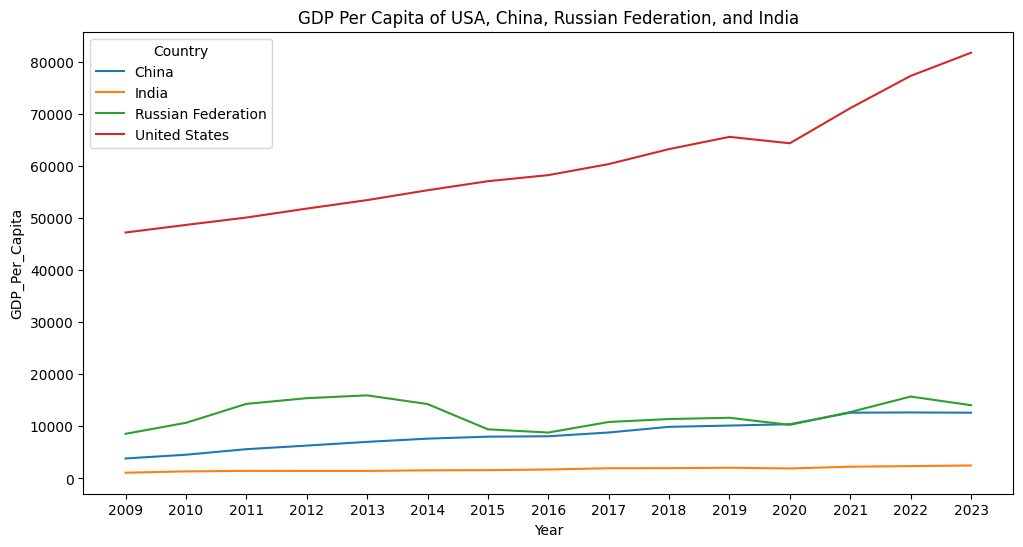

In [59]:
# plot gpd per capita of usa, china russian and india
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=df[df['Country'].isin(['United States', 'China', 'Russian Federation', 'India'])], hue='Country')
plt.title('GDP Per Capita of USA, China, Russian Federation, and India')
plt.show()

In [60]:
pd.read_csv('eda.csv')

,Country,Year,Gross_National_Income,Industry_growth_rate,Inflation_rate,Labor_force,Population,GDP_Per_Capita,Trade_Rate,Trade_Ratio
0,Afghanistan,2020,2.010516e+10,-5.0,2.0,9105733.0,38972230.0,512.0,0.0,0.0
1,Afghanistan,2021,1.435263e+10,-13.0,2.0,9356574.0,40099462.0,356.0,0.0,0.0
2,Afghanistan,2022,1.454522e+10,-6.0,2.0,8803873.0,41128771.0,353.0,0.0,0.0
3,Afghanistan,2023,1.319898e+10,-2.0,2.0,8920521.0,42239854.0,2233.0,0.0,0.0
4,Albania,2009,1.185274e+10,2.0,2.0,1258916.0,2927519.0,4114.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3239,Zimbabwe,2019,2.144526e+10,-9.0,255.0,5912685.0,15354608.0,1422.0,1.0,1.0
3240,Zimbabwe,2020,2.107884e+10,-8.0,557.0,6001349.0,15669666.0,1373.0,1.0,1.0
3241,Zimbabwe,2021,2.785413e+10,6.0,99.0,6182422.0,15993524.0,1774.0,1.0,1.0
3242,Zimbabwe,2022,2.681677e+10,5.0,105.0,6370612.0,16320537.0,1677.0,1.0,1.0


In [61]:
# conver the year column to integer
df['Year'] = df['Year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 11 to 3254
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                3244 non-null   object 
 1   Year                   3244 non-null   int64  
 2   Gross_National_Income  3244 non-null   float64
 3   Industry_growth_rate   3244 non-null   float64
 4   Inflation_rate         3244 non-null   float64
 5   Labor_force            3244 non-null   float64
 6   Population             3244 non-null   float64
 7   GDP_Per_Capita         3244 non-null   float64
 8   Trade_Rate             3244 non-null   float64
 9   Trade_Ratio            3244 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 278.8+ KB


In [62]:
# # # Normalize the data
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# # Display the normalized
# df.head()

In [63]:
# how to interpret the data
df.shape

(3244, 10)

In [64]:
# X features
X = df.drop(columns=['Country','GDP_Per_Capita'], axis=1)

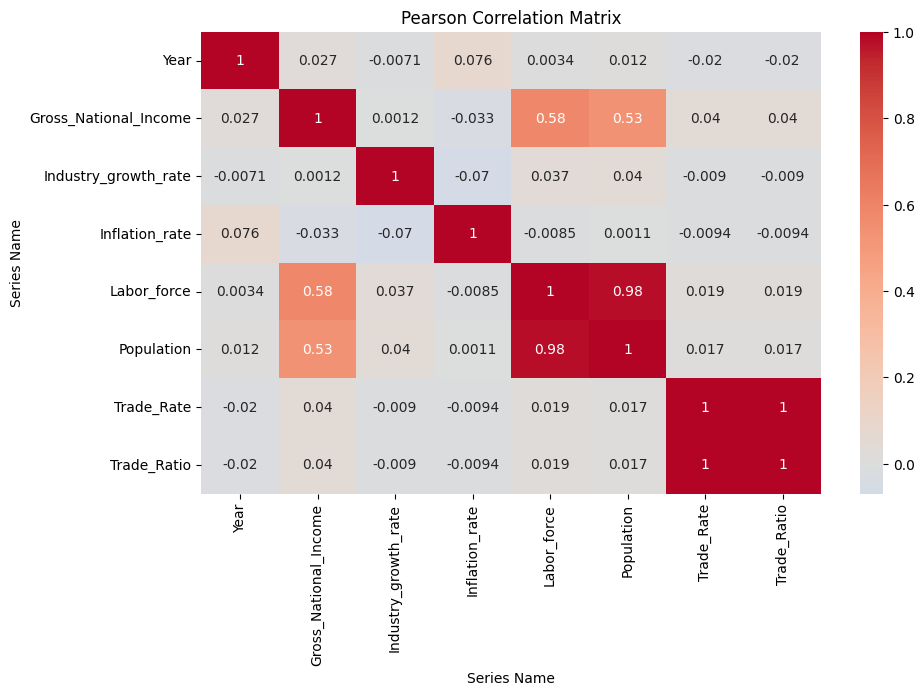

In [65]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr = X.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [66]:
# some features are highly correlated, we can remove them
# Remove Trade_Ration and Labor_force
df.drop(columns=['Trade_Ratio', 'Labor_force'], inplace=True)

df.shape

(3244, 8)

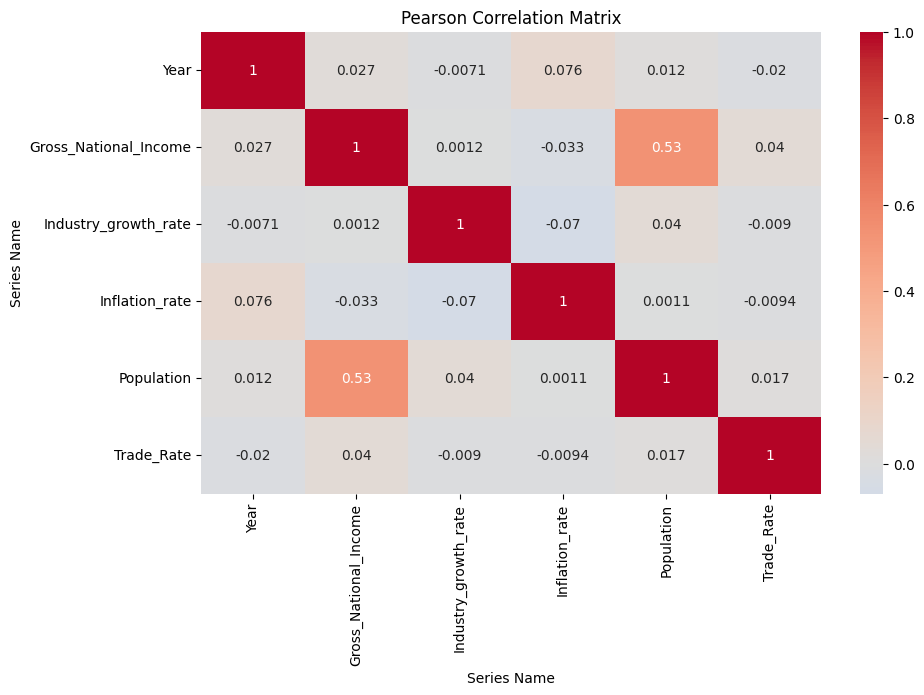

In [67]:
X = df.drop(columns=['Country','GDP_Per_Capita'], axis=1)

# Pearson correlation
# Calculate the correlation matrix
pearson_corr = X.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [68]:
df.describe()

Series Name,Year,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,GDP_Per_Capita,Trade_Rate
count,3244.000000,3.244000e+03,3244.000000,3244.000000,3.244000e+03,3244.000000,3244.000000
mean,2016.006782,3.979184e+11,2.266030,6.645499,3.435635e+07,18041.886252,0.923551
std,4.322986,1.702012e+12,11.546757,19.456842,1.352108e+08,26361.080953,0.434782
min,2009.000000,4.836190e+07,-77.000000,-17.000000,1.023300e+04,200.000000,0.000000
25%,2012.000000,8.136734e+09,-1.000000,2.000000,7.457315e+05,2388.500000,1.000000
50%,2016.000000,3.173132e+10,2.000000,3.000000,6.147884e+06,7085.500000,1.000000
75%,2020.000000,2.035960e+11,6.000000,7.000000,2.237028e+07,22945.750000,1.000000
max,2023.000000,2.752510e+13,223.000000,557.000000,1.428628e+09,240862.000000,4.000000


In [69]:
df.columns

Index(['Country', 'Year', 'Gross_National_Income', 'Industry_growth_rate',
       'Inflation_rate', 'Population', 'GDP_Per_Capita', 'Trade_Rate'],
      dtype='object', name='Series Name')

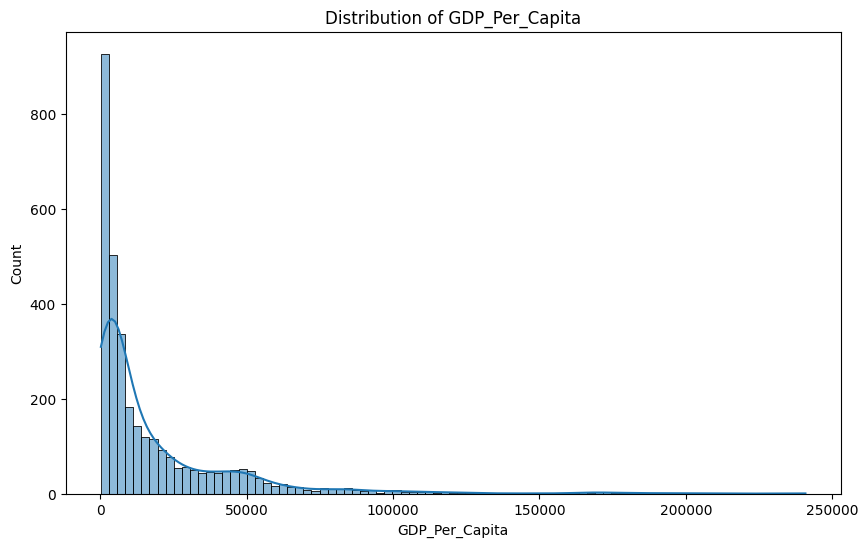

In [70]:
# distribution of the GDP_Per_Capita
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP_Per_Capita'], kde=True)
plt.title('Distribution of GDP_Per_Capita')
plt.show()


The histogram revealed a highly skewed distribution with most countries having a GDP per capita below $50,000, suggesting economic disparities among countries.

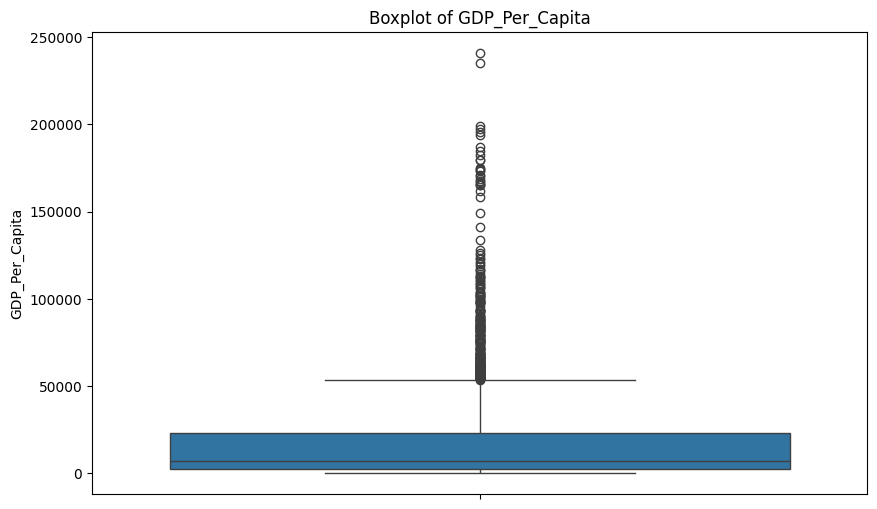

In [71]:
# find outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['GDP_Per_Capita'])
plt.title('Boxplot of GDP_Per_Capita')
plt.show()

This plot highlighted numerous outliers, indicating that a few countries have significantly higher GDP per capita compared to the majority.

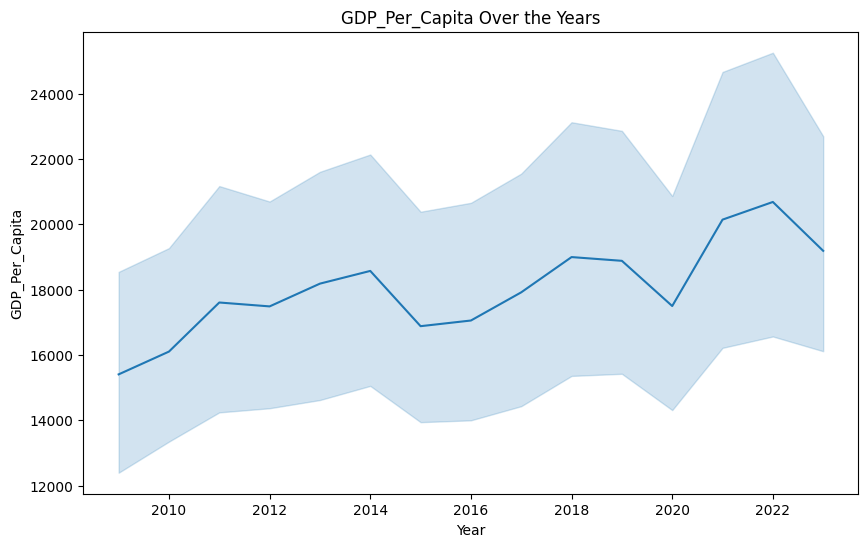

In [72]:
# plot the GDP_Per_Capita over the years put year on ascending order
df = df.sort_values('Year') 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=df)
plt.title('GDP_Per_Capita Over the Years')
plt.show()

A line graph showed fluctuations over the years with a general trend of increase, reflecting global economic growth and variability.

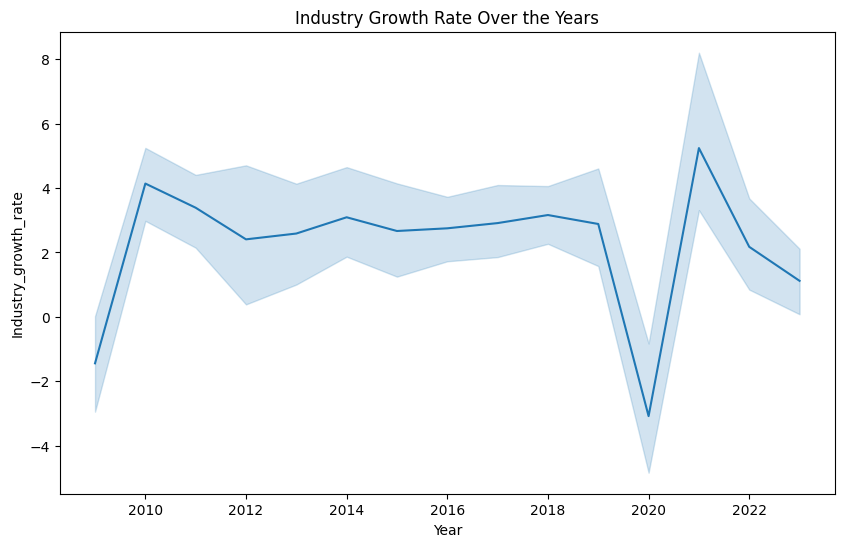

In [73]:
# plot the industry growth rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Industry_growth_rate', data=df)
plt.title('Industry Growth Rate Over the Years')
plt.show()

This graph displayed a variable growth rate with periods of decline and recovery, emphasizing the volatile nature of industrial growth.

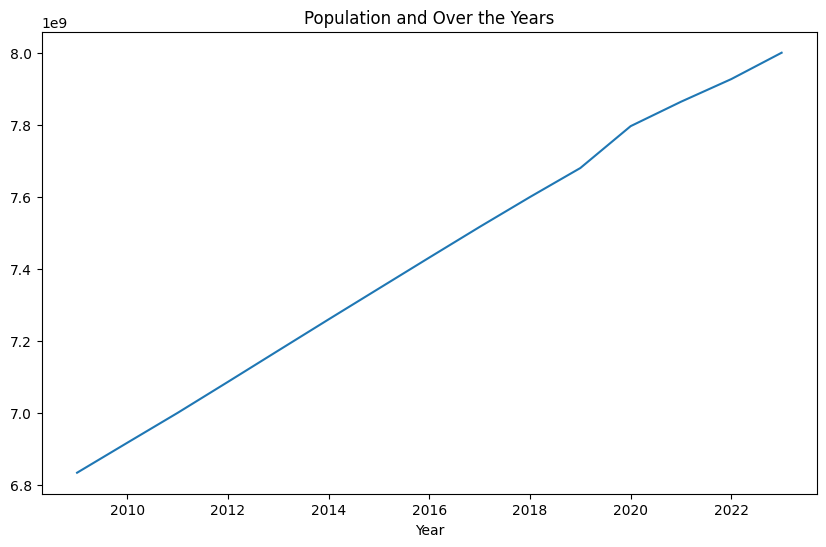

In [74]:
# group by year and the population
population = df.groupby('Year')['Population'].sum()

# plot the population over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=population.index, y=population.values)
plt.title('Population and Over the Years')
plt.show()

Illustrated a steady increase in global population, which is a crucial factor in economic scaling and development strategies.

In [75]:
# onehote encoded
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,GDP_Per_Capita,Trade_Rate,Country_Albania,Country_Algeria,Country_American Samoa,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Viet Nam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
705,2009,2.343674e+10,4.0,1.0,20677762.0,1639.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
720,2009,5.975207e+10,-11.0,2.0,4305181.0,14423.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
675,2009,8.961397e+09,16.0,4.0,4257230.0,2284.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
690,2009,2.974471e+10,-6.0,8.0,4563127.0,6738.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,2009,3.227443e+11,-6.0,5.0,40684338.0,8184.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
# save the cleaned DataFrame to a new CSV file
# df.to_csv('ml.csv', index=False)

In [77]:
# pd.read_csv('ml.csv')